# 3주차
* 통신사 고객 이탈 데이터셋
* 캘리포니아에 거주하는 7,043명의 고객들이 사용하는 폰, 인터넷 서비스 관련 내용을 포함
* 이탈 여부를 예측, 이탈 요인을 파악

# 데이터 이해

## Customer_info

* CustomerID: 고객 구분 아이디
* Gender: 성별
* Age: 나이
* Senior Citizen: 65세 이상 여부 (Yes, No)
* Married: 결혼 여부
* Dependents: 부양자 여부
* Number of Dependents: 부양자 수

## Location_Data

* CustomerID: 고객 구분 아이디
* Country: 주 거주지 국가
* State: 주 거주지 주
* City: 주 거주지 도시
* Zip Code: 주 거주지 우편번호 (미국 분할, 각 주 분할, 배달구역 번호로 구성)
* Total Population: Zip Code로 추산한 현재 인구 수
* Latitude: 위도
* Longtitude: 경도

## Online_Service

* CustomerID: 고객 구분 아이디
* Phone Service: 집 전화 서비스 구독 여부
* Internet Service: 인터넷 서비스 구독 여부 (No, DSL, Fiber Optic, Cable)
* Online Security: 온라인 보안 서비스 구독 여부
* Online Backup: 온라인 백업 서비스 구독 여부
* Device Protection Plan: 기기 보안 플랜 구독 여부
* Premium Tech Support: 기술 지원 플랜 구독 여부
* Streaming TV: TV 프로그램 스트리밍 서비스 구독 여부
* Streaming Movies: 영화 스트리밍 서비스 구독 여부
* Streaming Music: 음악 스트리밍 서비스 구독 여부

## Payment_info

* CustomerID: 고객 구분 아이디
* Contract: 계약 유형 (Month-to-Month, One Year, Two Year)
* Paperless Billing: 전자 영수증 발급 여부
* Payment Method: 결제 수단
* Monthly Charge: 가장 최근 월 결제 금액
* Total Charges: 총 결제 금액
* Total Refunds: 총 환불 금액
* Total Extra Data: 추가 데이터 사용 금액
* Total Long Distance Charges: 지역 통화를 벗어난 통화에 대한 총 요금

## Service_Option

* CustomerID: 고객 구분 아이디
* Tenure in Months: 회사 서비스를 이용한 주기
* Referred a Friend: 친구나 가족에게 추천받은 여부
* Number of Referrals: 고객이 지인에게 추천한 수
* Avg Monthly GB Download: 평균 다운로드 기가바이트
* Offer: 고객이 수락한 마지막 마케팅 제안
* Phone Service: 집 전화 서비스 구독 여부
* Multiple Lines: 회사 내 다중 전화선 사용 여부

## Status_Analysis

* CustomerID: 고객 구분 아이디
* Satisfation Score: 고객 만족도 (1~5)
* Customer Status: 고객 상태 (Chunred, Stayed, Joined)
* Churn Label: 이탈 여부 (Yes, No)
* Churn Value: 이탈 여부 (0, 1)
* Churn Score: 이탈 가능성 예측 점수 (0~100)

# 각 데이터 셋에서 사용할 컬럼

* Customer_Info: Dependents 제외 모두 사용 (Number of Dependents 컬럼 대신)
* Location_Data: Country, State 제외 모두 사용 (국가, 주 동일한 값인지 확인 필요)
* Online_Services: 모두 사용
* Payment_Info: Monthly Charge 제외 모두 사용 (Total Charge 컬럼 대신)
* Service_Options: 모두 사용
* Status_Analysis: CustomerID, Satisfaction Score, Churn Value만 사용

# 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

# preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler, PowerTransformer, QuantileTransformer
from functools import reduce

# validation
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, GridSearchCV, cross_val_score

# valuation
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score


# modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
%matplotlib inline

# etc 
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
#데이터 불러오기-cusomer_info
customer_info = pd.read_csv("C:/Users/kshee/Downloads/archive/Customer_Info.csv")
customer_info.head()

,customer_id,gender,age,under_30,senior_citizen,partner,dependents,number_of_dependents,married
0,0002-ORFBO,Female,37,No,No,Yes,No,0,Yes
1,0003-MKNFE,Male,46,No,No,No,No,0,No
2,0004-TLHLJ,Male,50,No,No,No,No,0,No
3,0011-IGKFF,Male,78,No,Yes,Yes,No,0,Yes
4,0013-EXCHZ,Female,75,No,Yes,Yes,No,0,Yes


In [3]:
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customer_id           7043 non-null   object
 1   gender                7043 non-null   object
 2   age                   7043 non-null   int64 
 3   under_30              7043 non-null   object
 4   senior_citizen        7043 non-null   object
 5   partner               7043 non-null   object
 6   dependents            7043 non-null   object
 7   number_of_dependents  7043 non-null   int64 
 8   married               7043 non-null   object
dtypes: int64(2), object(7)
memory usage: 495.3+ KB


In [4]:
#결측값 확인 
customer_info.isna().sum()

customer_id             0
gender                  0
age                     0
under_30                0
senior_citizen          0
partner                 0
dependents              0
number_of_dependents    0
married                 0
dtype: int64

In [5]:
#중복된 컬럼 제거
customer_info = customer_info.drop(columns=['dependents'])

In [6]:
#데이터 불러오기-location_data
location_data = pd.read_csv("C:/Users/kshee/Downloads/archive/Location_Data.csv")
location_data.head()

,customer_id,country,state,city,zip_code,total_population,latitude,longitude
0,0002-ORFBO,United States,California,Frazier Park,93225,4498,34.827662,-118.999073
1,0003-MKNFE,United States,California,Glendale,91206,31297,34.162515,-118.203869
2,0004-TLHLJ,United States,California,Costa Mesa,92627,62069,33.645672,-117.922613
3,0011-IGKFF,United States,California,Martinez,94553,46677,38.014457,-122.115432
4,0013-EXCHZ,United States,California,Camarillo,93010,42853,34.227846,-119.079903


In [7]:
location_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       7043 non-null   object 
 1   country           7043 non-null   object 
 2   state             7043 non-null   object 
 3   city              7043 non-null   object 
 4   zip_code          7043 non-null   int64  
 5   total_population  7043 non-null   int64  
 6   latitude          7043 non-null   float64
 7   longitude         7043 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 440.3+ KB


In [8]:
#결측값 확인 
location_data.isna().sum()

customer_id         0
country             0
state               0
city                0
zip_code            0
total_population    0
latitude            0
longitude           0
dtype: int64

In [9]:
# 데이터 기본 정보 확인
location_data[['country', 'state']].value_counts()

country        state     
United States  California    7043
Name: count, dtype: int64


country, state 컬럼값이 모두 동일하므로 삭제 결정


In [10]:
#컬럼 제거
location_data = location_data.drop(columns=['country', 'state'])

In [11]:
#데이터 불러오기-online_service
online_services = pd.read_csv("C:/Users/kshee/Downloads/archive/Online_Services.csv")
online_services.head()

,customer_id,phone_service,internet_service,online_security,online_backup,device_protection,premium_tech_support,streaming_tv,streaming_movies,streaming_music,internet_type
0,0002-ORFBO,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Cable
1,0003-MKNFE,Yes,Yes,No,No,No,No,No,Yes,Yes,Cable
2,0004-TLHLJ,Yes,Yes,No,No,Yes,No,No,No,No,Fiber Optic
3,0011-IGKFF,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Fiber Optic
4,0013-EXCHZ,Yes,Yes,No,No,No,Yes,Yes,No,No,Fiber Optic


In [12]:
#데이터 기본 정보 확인 
online_services.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customer_id           7043 non-null   object
 1   phone_service         7043 non-null   object
 2   internet_service      7043 non-null   object
 3   online_security       7043 non-null   object
 4   online_backup         7043 non-null   object
 5   device_protection     7043 non-null   object
 6   premium_tech_support  7043 non-null   object
 7   streaming_tv          7043 non-null   object
 8   streaming_movies      7043 non-null   object
 9   streaming_music       7043 non-null   object
 10  internet_type         5517 non-null   object
dtypes: object(11)
memory usage: 605.4+ KB


In [13]:
#결측값 확인 
online_services.isna().sum()

customer_id                0
phone_service              0
internet_service           0
online_security            0
online_backup              0
device_protection          0
premium_tech_support       0
streaming_tv               0
streaming_movies           0
streaming_music            0
internet_type           1526
dtype: int64

In [14]:
online_services['internet_type'] = online_services['internet_type'].fillna('Not Provided')

'internet_type'에 결측값이 존재하였고, 데이터 손실을 방지하기 위해 명시적으로 나타냄

In [15]:
#데이터 불러오기-payment_info
payment_info = pd.read_csv("C:/Users/kshee/Downloads/archive/Payment_Info.csv")
payment_info.head()

,customer_id,contract,paperless_billing,payment_method,monthly_ charges,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
0,0002-ORFBO,One Year,Yes,Mailed check,65.6,42.39,593.30,0.00,0,381.51,974.81
1,0003-MKNFE,Month-to-Month,No,Mailed check,59.9,10.69,542.40,38.33,10,96.21,610.28
2,0004-TLHLJ,Month-to-Month,Yes,Electronic check,73.9,33.65,280.85,0.00,0,134.60,415.45
3,0011-IGKFF,Month-to-Month,Yes,Electronic check,98.0,27.82,1237.85,0.00,0,361.66,1599.51
4,0013-EXCHZ,Month-to-Month,Yes,Mailed check,83.9,7.38,267.40,0.00,0,22.14,289.54


In [16]:
#데이터 기본 정보 확인
payment_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customer_id                        7043 non-null   object 
 1   contract                           7043 non-null   object 
 2   paperless_billing                  7043 non-null   object 
 3   payment_method                     7043 non-null   object 
 4   monthly_ charges                   7043 non-null   float64
 5   avg_monthly_long_distance_charges  7043 non-null   float64
 6   total_charges                      7043 non-null   float64
 7   total_refunds                      7043 non-null   float64
 8   total_extra_data_charges           7043 non-null   int64  
 9   total_long_distance_charges        7043 non-null   float64
 10  total_revenue                      7043 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 605.4+ 

* total_revenue 컬럼은 고객의 총 수입을 의미하는 것으로 추정됨.

In [17]:
payment_info.isna().sum()

customer_id                          0
contract                             0
paperless_billing                    0
payment_method                       0
monthly_ charges                     0
avg_monthly_long_distance_charges    0
total_charges                        0
total_refunds                        0
total_extra_data_charges             0
total_long_distance_charges          0
total_revenue                        0
dtype: int64

In [18]:
#컬럼 제거 
payment_info = payment_info.drop(columns=['monthly_ charges'])

In [19]:
#데이터 불러오기-service_option
service_options = pd.read_csv("C:/Users/kshee/Downloads/archive/Service_Options.csv")
service_options.head()

,customer_id,tenure,internet_service,phone_service,multiple_lines,avg_monthly_gb_download,unlimited_data,offer,referred_a_friend,number_of_referrals
0,0002-ORFBO,9,Yes,Yes,No,16,Yes,NaN,Yes,2
1,0003-MKNFE,9,Yes,Yes,Yes,10,No,NaN,No,0
2,0004-TLHLJ,4,Yes,Yes,No,30,Yes,Offer E,No,0
3,0011-IGKFF,13,Yes,Yes,No,4,Yes,Offer D,Yes,1
4,0013-EXCHZ,3,Yes,Yes,No,11,Yes,NaN,Yes,3


In [20]:
#데이터 기본 정보 확인 
service_options.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   customer_id              7043 non-null   object
 1   tenure                   7043 non-null   int64 
 2   internet_service         7043 non-null   object
 3   phone_service            7043 non-null   object
 4   multiple_lines           7043 non-null   object
 5   avg_monthly_gb_download  7043 non-null   int64 
 6   unlimited_data           7043 non-null   object
 7   offer                    3166 non-null   object
 8   referred_a_friend        7043 non-null   object
 9   number_of_referrals      7043 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 550.4+ KB


* 데이터 정의에 포함되지 않은 'unlimited_data' 컬럼이 있음.
* 'unlimited_data' 컬럼은 무제한 데이터 요금제 이용 여부를 나타내는 것으로
  추정됨.
* online_services 데이터셋과 중복인 internet_service, phone_service 컬럼
  제외

In [21]:
#결측값 확인 
service_options.isna().sum()

customer_id                   0
tenure                        0
internet_service              0
phone_service                 0
multiple_lines                0
avg_monthly_gb_download       0
unlimited_data                0
offer                      3877
referred_a_friend             0
number_of_referrals           0
dtype: int64

In [22]:
service_options['offer'] = service_options['offer'].fillna('Not Provided')

'offer'에 결측값이 존재하였고, 데이터 손실을 방지하기 위해 명시적으로 나타냄

In [23]:
#컬럼 제거
service_options =service_options.drop(columns=['internet_service', 'phone_service'])

In [24]:
#데이터 불러오기-status_analysis
status_analysis = pd.read_csv("C:/Users/kshee/Downloads/archive/Status_Analysis.csv")
status_analysis.head()

,customer_id,satisfaction_score,cltv,customer_status,churn_score,churn_label,churn_value,churn_category,churn_reason
0,0002-ORFBO,3,2205,Stayed,65,No,0,Not Applicable,NaN
1,0003-MKNFE,5,5414,Stayed,66,No,0,Not Applicable,NaN
2,0004-TLHLJ,1,4479,Churned,71,Yes,1,Competitor,Competitor had better devices
3,0011-IGKFF,1,3714,Churned,91,Yes,1,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,1,3464,Churned,68,Yes,1,Dissatisfaction,Network reliability


* churn_category, churn_reason 컬럼은 워드 클라우드로 나타내서 인사이트를 얻을 수 있음.
* 'cltv' 컬럼은 고객 생애 가치를 나타내는 것으로 추정됨.

In [25]:
#데이터 기본 정보 확인
status_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         7043 non-null   object
 1   satisfaction_score  7043 non-null   int64 
 2   cltv                7043 non-null   int64 
 3   customer_status     7043 non-null   object
 4   churn_score         7043 non-null   int64 
 5   churn_label         7043 non-null   object
 6   churn_value         7043 non-null   int64 
 7   churn_category      7043 non-null   object
 8   churn_reason        1869 non-null   object
dtypes: int64(4), object(5)
memory usage: 495.3+ KB


In [26]:
#결측값 확인 
status_analysis.isna().sum()

customer_id              0
satisfaction_score       0
cltv                     0
customer_status          0
churn_score              0
churn_label              0
churn_value              0
churn_category           0
churn_reason          5174
dtype: int64

In [27]:
status_analysis['churn_reason'] = status_analysis['churn_reason'].fillna('Not Provided')

In [28]:
# 각 데이터셋에서 사용할 컬럼만 선택해서 추출
churn_reason = status_analysis[['churn_category', 'churn_reason']]
status_analysis = status_analysis[['customer_id', 'satisfaction_score', 'churn_value']]

In [29]:
# 하나의 데이터셋으로 합치기 
dataframes = [customer_info, location_data, online_services, payment_info, service_options, status_analysis]
df = reduce(lambda left, right: pd.merge(left, right, on='customer_id', how='inner'), dataframes)
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customer_id                        7043 non-null   object 
 1   gender                             7043 non-null   object 
 2   age                                7043 non-null   int64  
 3   under_30                           7043 non-null   object 
 4   senior_citizen                     7043 non-null   object 
 5   partner                            7043 non-null   object 
 6   number_of_dependents               7043 non-null   int64  
 7   married                            7043 non-null   object 
 8   city                               7043 non-null   object 
 9   zip_code                           7043 non-null   int64  
 10  total_population                   7043 non-null   int64  
 11  latitude                           7043 non-null   float

# EDA

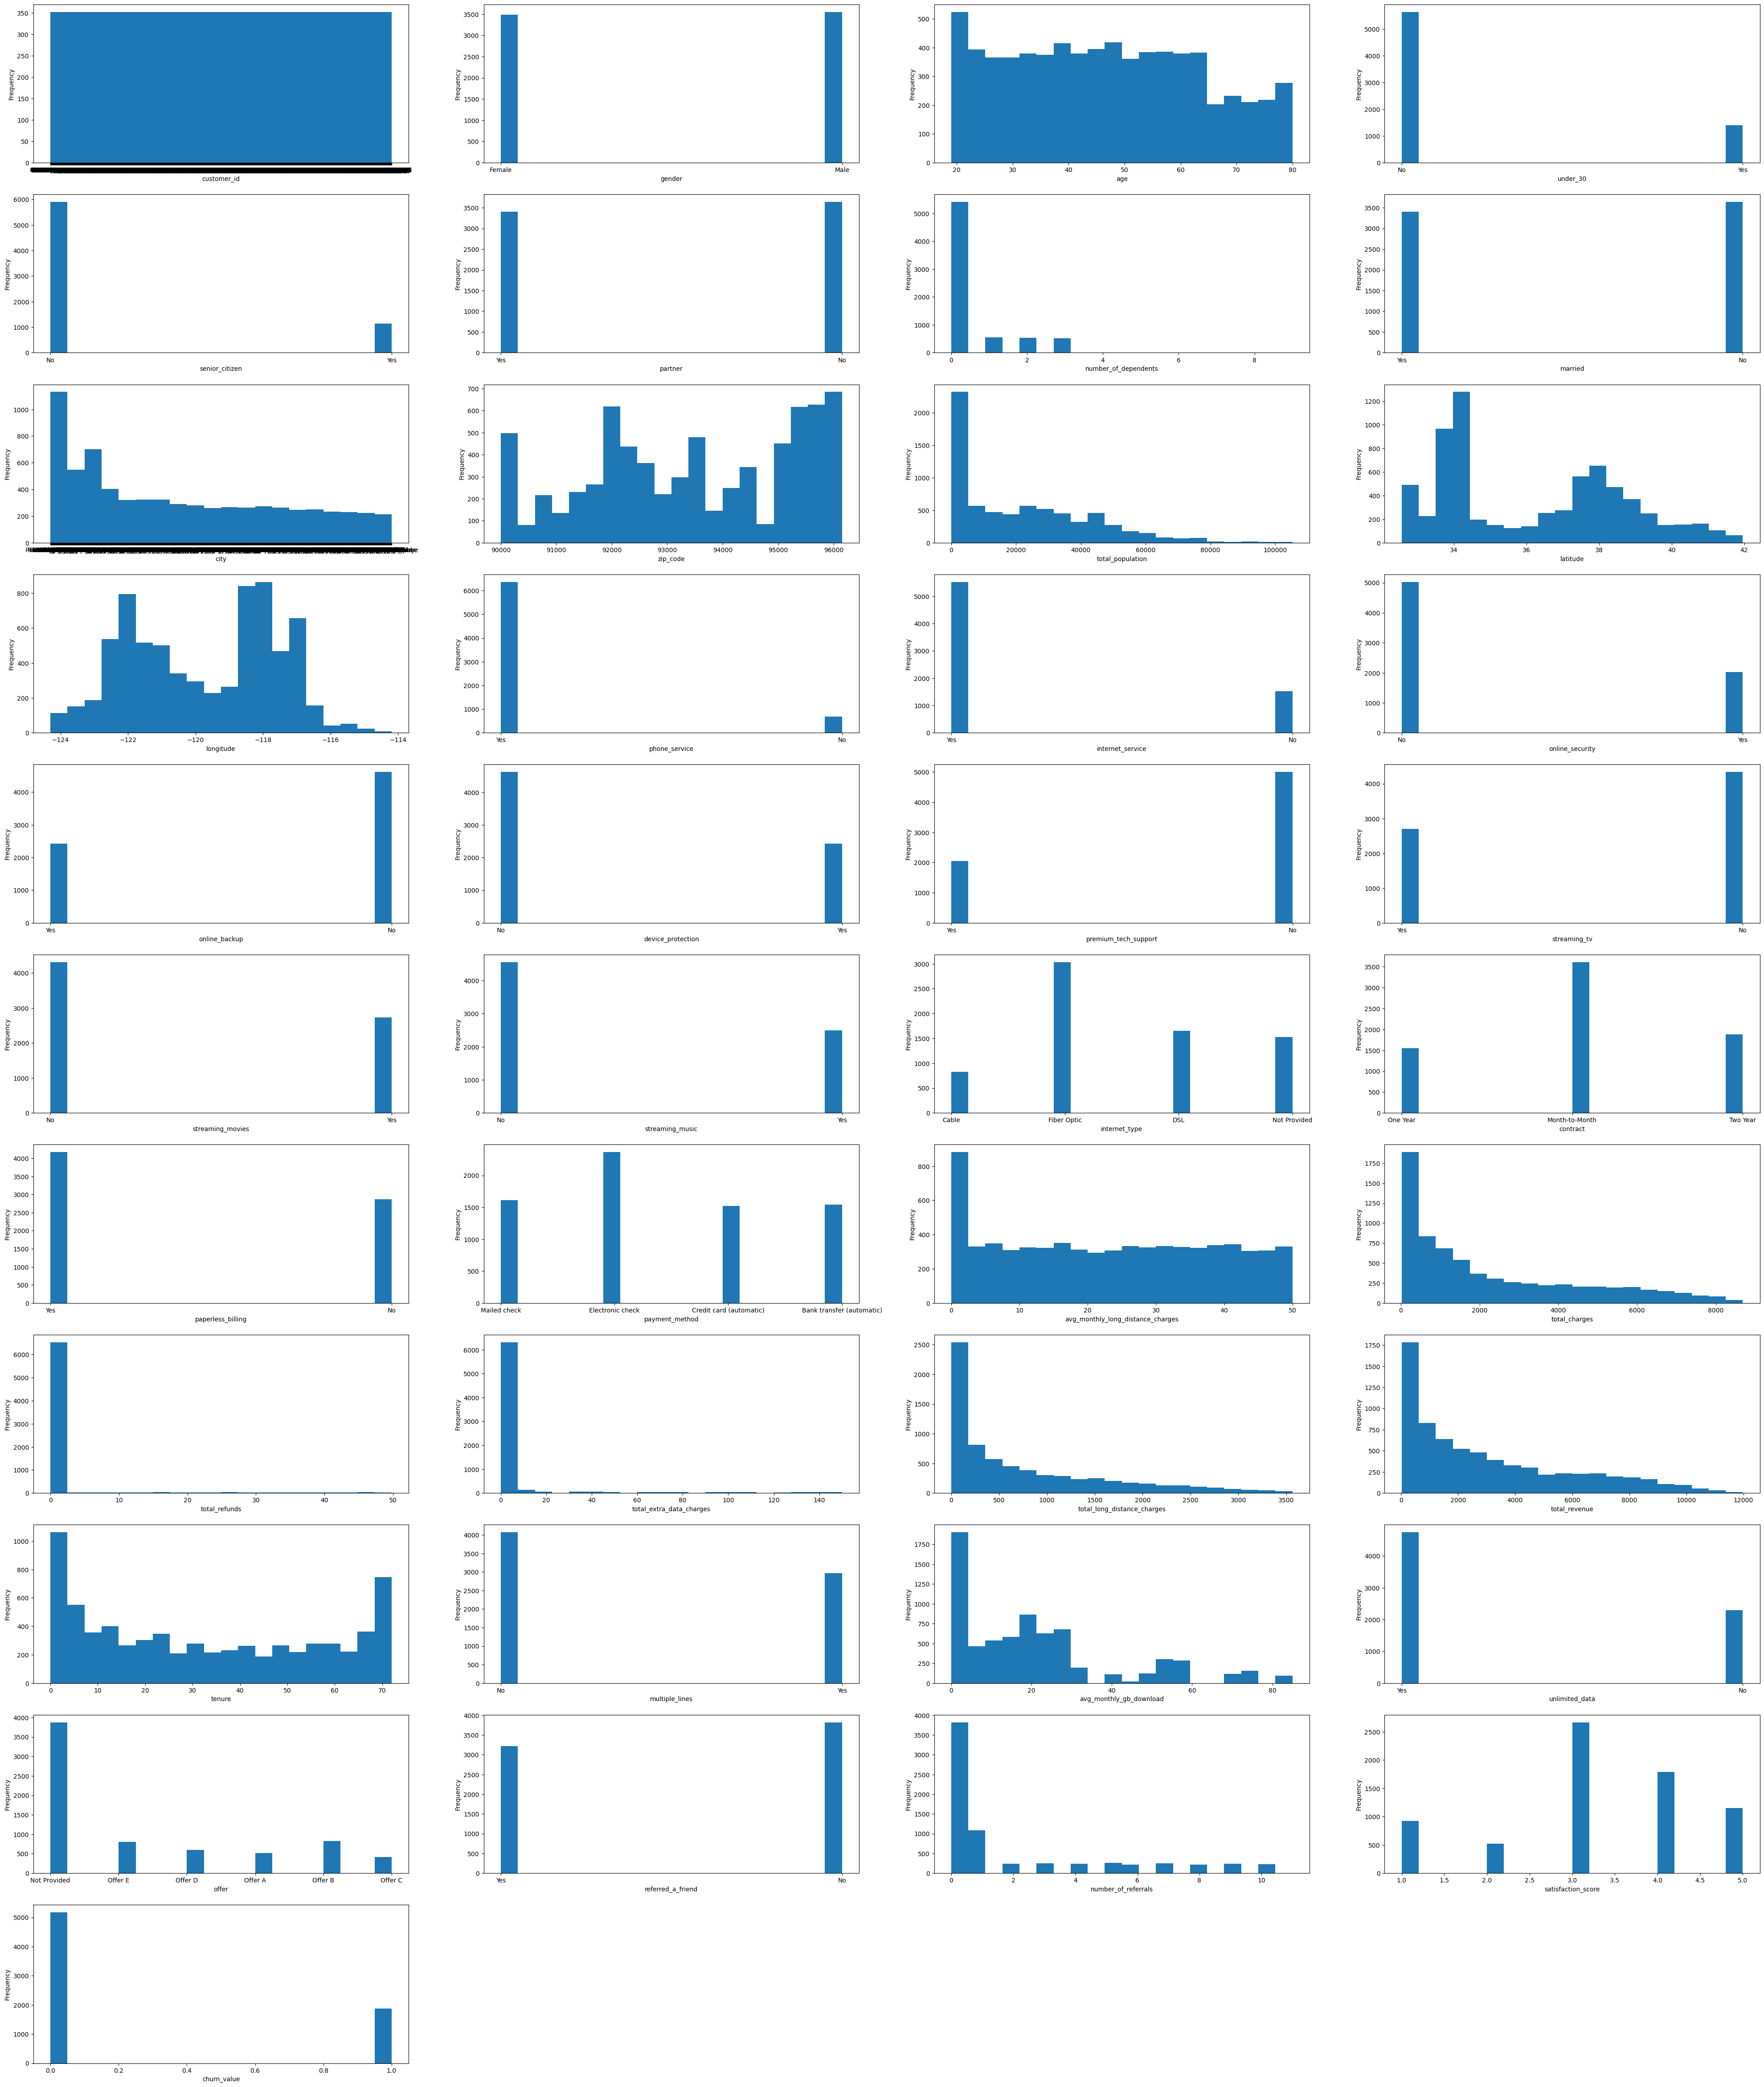

In [30]:
# 속성 분포 확인
fig, ax = plt.subplots(11, 4, figsize=(50, 60)) # (열, 행행)

idx = 0
for i in range(11): # subplot 열
    for j in range(4): # subplot 행
        if idx < len(df.columns):
            colname = list(df.columns)[idx]
            ax[i][j].hist(df[colname], bins=20)
            ax[i][j].set_xlabel(colname)
            ax[i][j].set_ylabel('Frequency')
            idx += 1
        else: 
            ax[i][j].axis('off')

plt.show()

In [31]:
#기본 통계 정보 확인
df.describe()

,age,number_of_dependents,zip_code,total_population,latitude,longitude,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,tenure,avg_monthly_gb_download,number_of_referrals,satisfaction_score,churn_value
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.071134,22139.814568,36.197455,-119.756684,22.958954,2280.381264,1.962182,6.860713,749.099262,3034.379056,32.371149,20.515405,1.951867,3.244924,0.265370
std,16.750352,0.962802,1856.768045,21152.174407,2.468929,2.154425,15.448113,2266.220462,7.902614,25.104978,846.660055,2865.204542,24.559481,20.418940,3.001199,1.201657,0.441561
min,19.000000,0.000000,90001.000000,11.000000,32.555828,-124.301372,0.000000,18.800000,0.000000,0.000000,0.000000,21.360000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,32.000000,0.000000,92101.000000,2344.000000,33.990646,-121.788090,9.210000,400.150000,0.000000,0.000000,70.545000,605.610000,9.000000,3.000000,0.000000,3.000000,0.000000
50%,46.000000,0.000000,93518.000000,17554.000000,36.205465,-119.595293,22.890000,1394.550000,0.000000,0.000000,401.440000,2108.640000,29.000000,17.000000,0.000000,3.000000,0.000000
75%,60.000000,0.000000,95329.000000,36125.000000,38.161321,-117.969795,36.395000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,55.000000,27.000000,3.000000,4.000000,1.000000
max,80.000000,9.000000,96150.000000,105285.000000,41.962127,-114.192901,49.990000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,72.000000,85.000000,11.000000,5.000000,1.000000


* total_population, total_charges, avg_monthly_gb_download 컬럼들의 각 평균과 표준편차가 비슷한 수준이므로 분포가 퍼져있음을 알 수 있음.
* 각 컬럼들의 값 범위가 크게 달라서 스케일링 작업도 필요함.

In [32]:
#범주형 통계 정보 확인
df.describe(include='object')

,customer_id,gender,under_30,senior_citizen,partner,married,city,phone_service,internet_service,online_security,...,streaming_movies,streaming_music,internet_type,contract,paperless_billing,payment_method,multiple_lines,unlimited_data,offer,referred_a_friend
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,1106,2,2,2,...,2,2,4,3,2,4,2,2,6,2
top,0002-ORFBO,Male,No,No,No,No,Los Angeles,Yes,Yes,No,...,No,No,Fiber Optic,Month-to-Month,Yes,Electronic check,No,Yes,Not Provided,No
freq,1,3555,5642,5901,3641,3641,293,6361,5517,5024,...,4311,4555,3035,3610,4171,2365,4072,4745,3877,3821


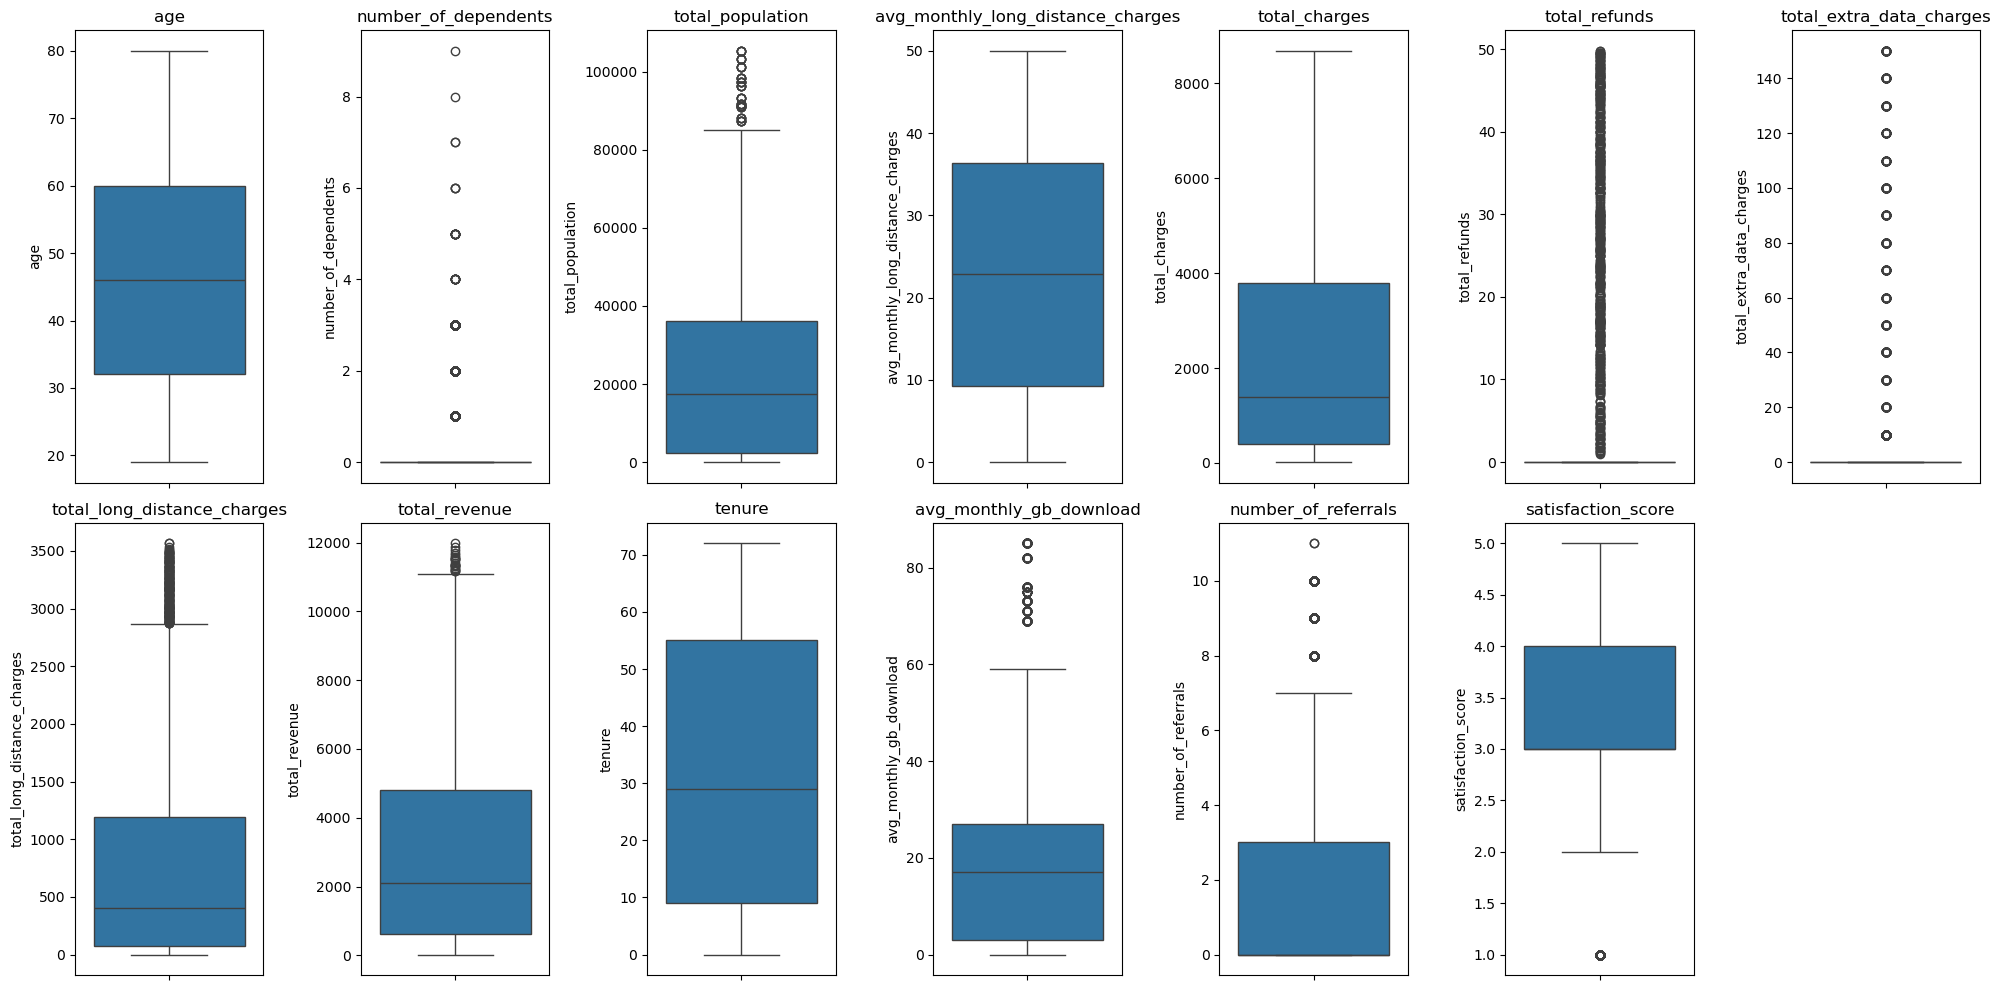

In [33]:
#이상치 탐지

# 열 목록 (박스플롯을 그릴 변수들)
columns_to_plot = [
    'age', 'number_of_dependents', 'total_population', 
    'avg_monthly_long_distance_charges', 'total_charges', 
    'total_refunds', 'total_extra_data_charges', 
    'total_long_distance_charges', 'total_revenue', 
    'tenure', 'avg_monthly_gb_download', 
    'number_of_referrals', 'satisfaction_score'
]

# 서브플롯 생성 (행과 열의 갯수 조정)
fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(20, 10))
axes = axes.flatten()  # 2D 배열을 1D로 평탄화

# 각 열에 대해 박스플롯 생성
for idx, column in enumerate(columns_to_plot):
    if idx < len(axes):  # 서브플롯 안에 맞출 경우만
        sns.boxplot(data=df, y=column, ax=axes[idx])
        axes[idx].set_title(column)

# 남는 서브플롯 숨기기
for idx in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()  # 레이아웃 조정
plt.show()


이상치로 보여지는 컬럼

* number_of_dependents, total_population, total_refunds, 
  total_extra_data_charges, total_long_distance_charges, total_revenue,
  avg_monthly_gb_download, number_of_referrals, stisfaction_score
* 고객 이탈 분석에서는 범위 외 값들이 존재할 수 있으며, 음수나 해당 컬럼 주제에 맞지 않
  는 값들은 없다고 판단되어 그대로 두고 분석을 진행함.
  *예시 분석과 모델링 결과가 크게 다르다고 판단되면 다시 이상치를 제거하고 분석 실행함.

컬럼 간 상관관계 파악

* 절대값 0.7이상의 상관관계를 가지는 컬럼들을 처리함.

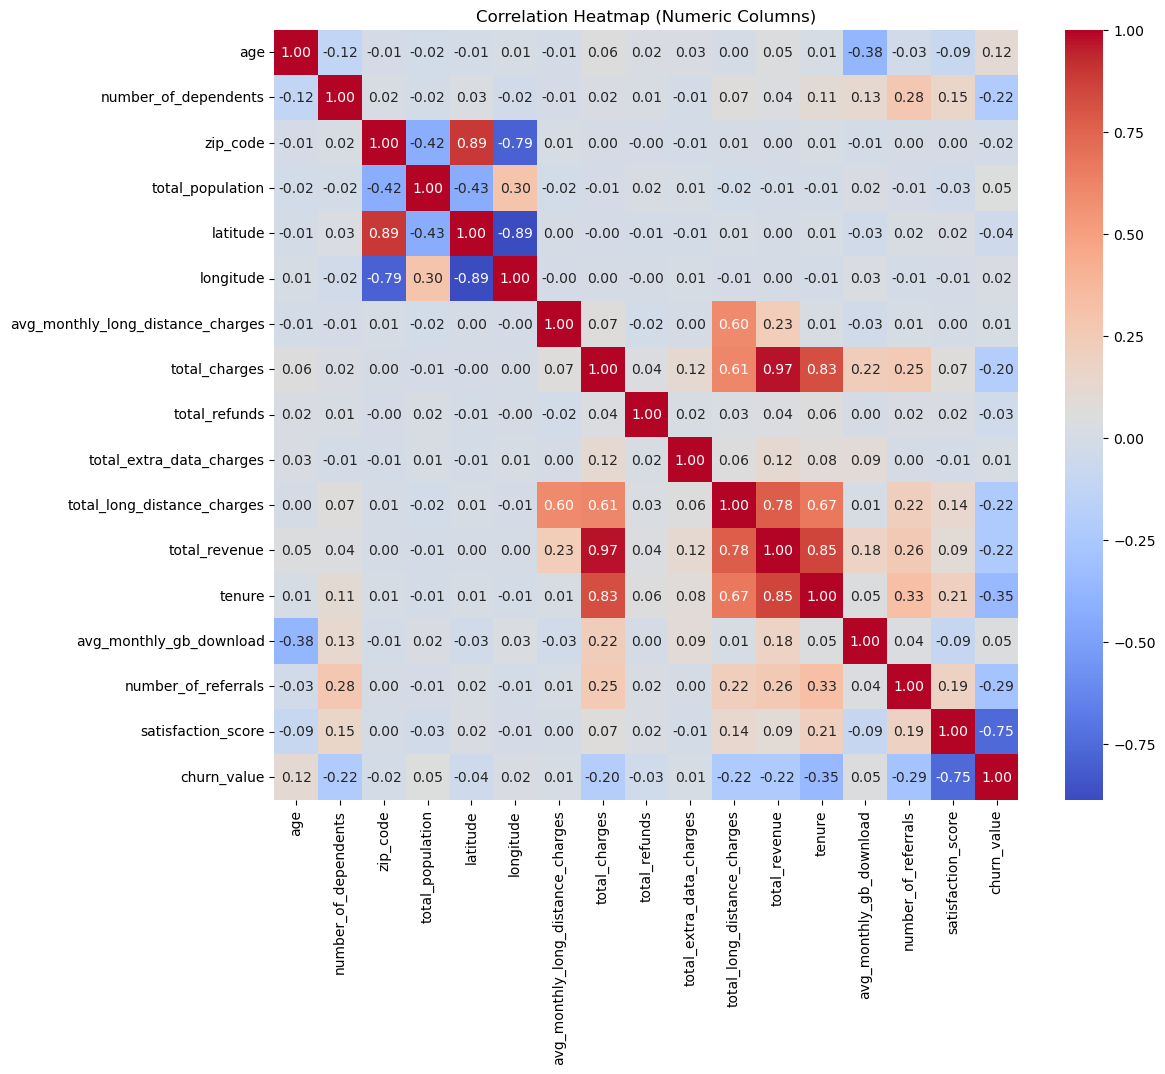

In [34]:
#컬럼 간 상관관계 파악
numeric_data = df.select_dtypes(include=['number'])

correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap (Numeric Columns)")
plt.show()

* 모델링을 위해 zip_code, latitude, longitude 컬럼들이 상관관계가 높으므로
  모두 제거
* satisfaction_score와 churn_value 컬럼이 상관관계가 높으므로 satisfaction_score
  제거
* total_revenue와 total_charges, total_long_distances_charges, tenure 컬럼이 상관관계
  가 높으므로 total_revenue 제거
* tenure과 total_charges 컬럼도 상관관계가 높으므로 tenure 제거

In [35]:
#상관관계가 높은 컬럼들 1차 제거
df = df.drop(columns=['zip_code', 'latitude', 'longitude', 'satisfaction_score', 'total_revenue', 'tenure'], axis=1)

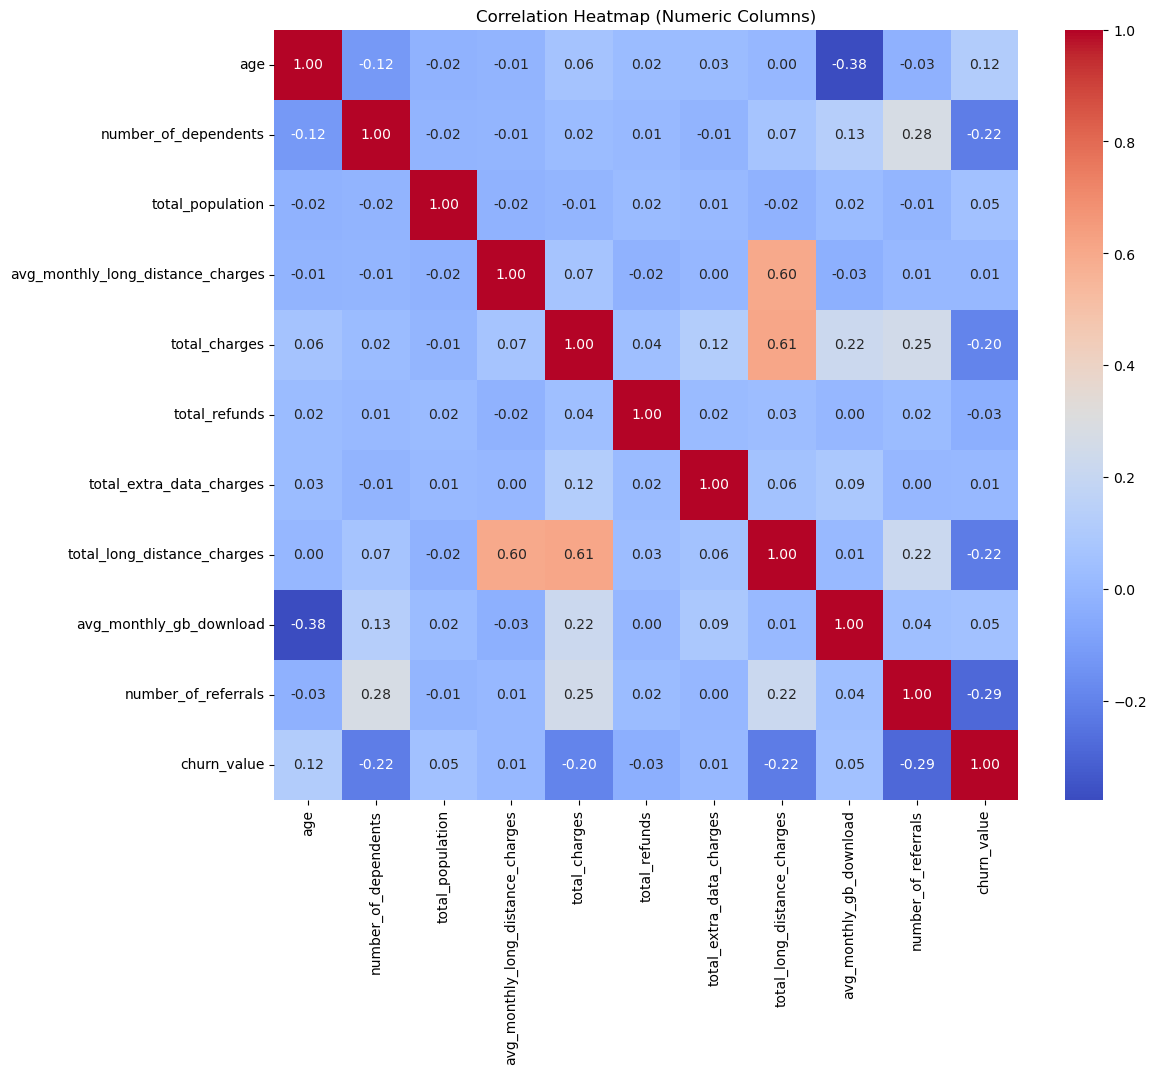

In [36]:
#제거한 후 컬럼간 상관관계 파악
numeric_data = df.select_dtypes(include=['number'])

correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap (Numeric Columns)")
plt.show()

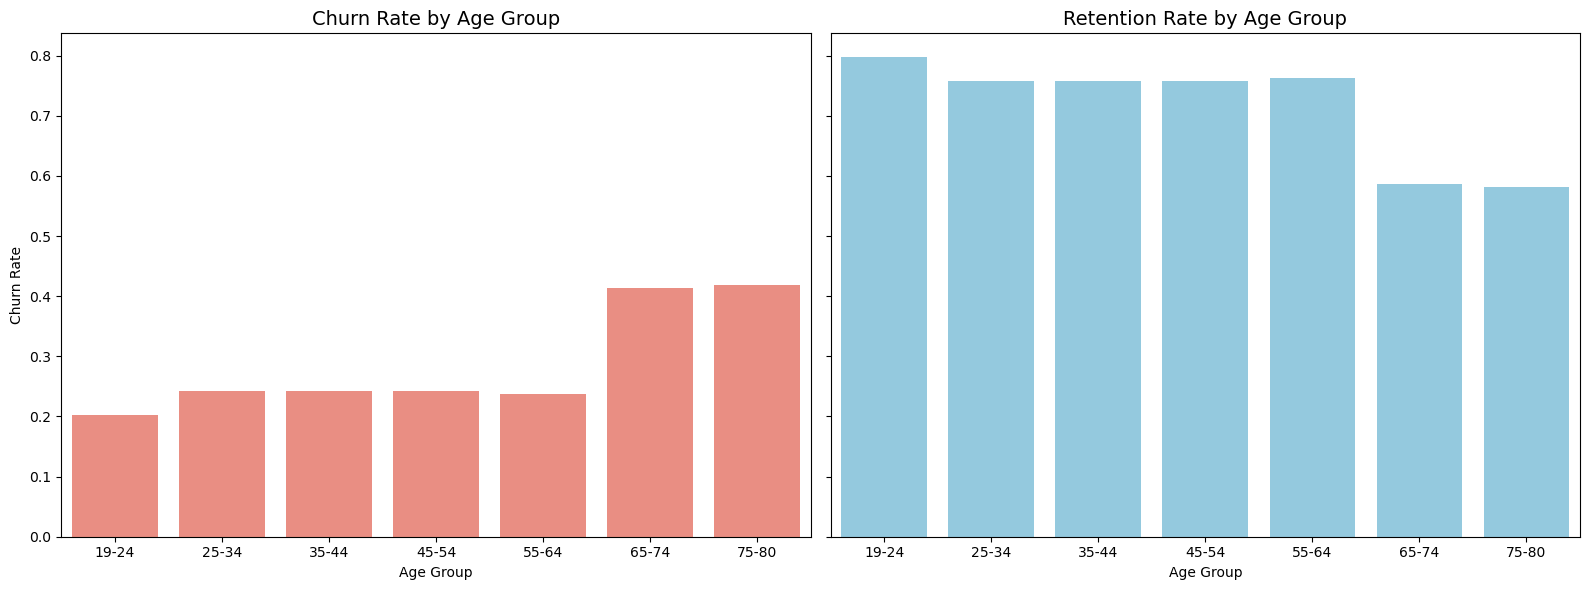

In [37]:
#나이대별 이탈과 유지 비율 시각화
#나이대를 구간으로 나기기
bins = [19, 25, 35, 45, 55, 65, 75, 80]  # 나이대 구간
labels = ['19-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-80']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# 나이대별 이탈/유지 비율 계산
churn_summary = df.groupby(['age_group', 'churn_value']).size().unstack(fill_value=0)
churn_summary['total'] = churn_summary[0] + churn_summary[1]
churn_summary['churn_rate'] = churn_summary[1] / churn_summary['total']
churn_summary['retain_rate'] = churn_summary[0] / churn_summary['total']

# 시각화
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# 이탈 비율 시각화
sns.barplot(x=churn_summary.index, y=churn_summary['churn_rate'], ax=ax[0], color='salmon')
ax[0].set_title('Churn Rate by Age Group', fontsize=14)
ax[0].set_ylabel('Churn Rate')
ax[0].set_xlabel('Age Group')

# 유지 비율 시각화
sns.barplot(x=churn_summary.index, y=churn_summary['retain_rate'], ax=ax[1], color='skyblue')
ax[1].set_title('Retention Rate by Age Group', fontsize=14)
ax[1].set_ylabel('Retention Rate')
ax[1].set_xlabel('Age Group')

plt.tight_layout()
plt.show()

In [38]:
#사용한 컬럼 제거
df = df.drop(columns=['age_group'])

* 65세 이상에서 이탈율이 높고, 65세 이하에서 유지율이 높음을 알 수 있음.

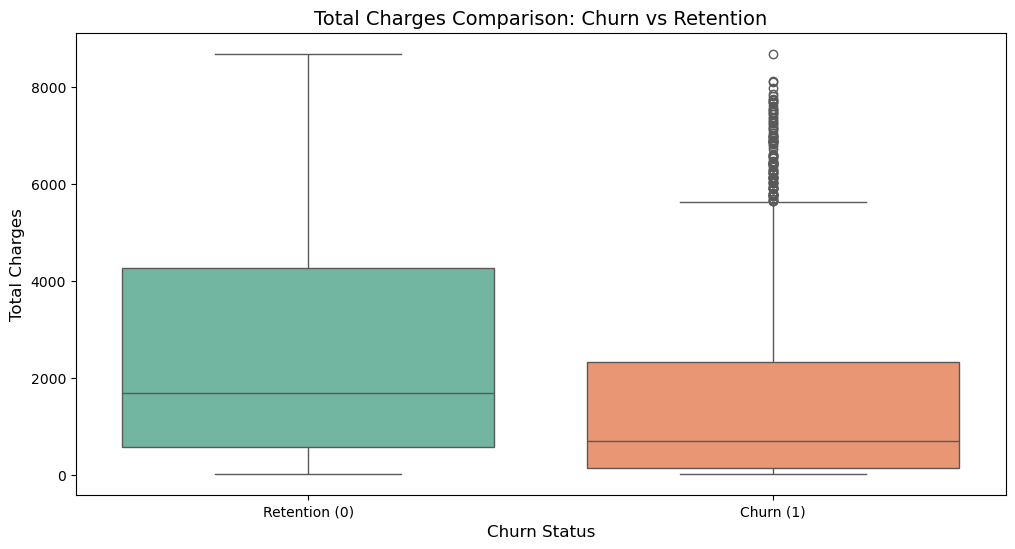

In [39]:
# 이탈한 사람과 유지한 사람의 총 결제 금액 비교
# 박스 플롯으로 이탈/유지 비교
plt.figure(figsize=(12, 6))
sns.boxplot(x='churn_value', y='total_charges', data=df, palette='Set2')
plt.xticks([0, 1], ['Retention (0)', 'Churn (1)'])
plt.title('Total Charges Comparison: Churn vs Retention', fontsize=14)
plt.xlabel('Churn Status', fontsize=12)
plt.ylabel('Total Charges', fontsize=12)
plt.show()

* 유지한 사람들이 이탈한 사람보다 총 결제 금액이 높다는 것을 확인할 수 있음.
* 이탈한 사람 중에서도 총 결제 금액이 높은 사람들이 존재한다는 것을 확인할 수 있음.

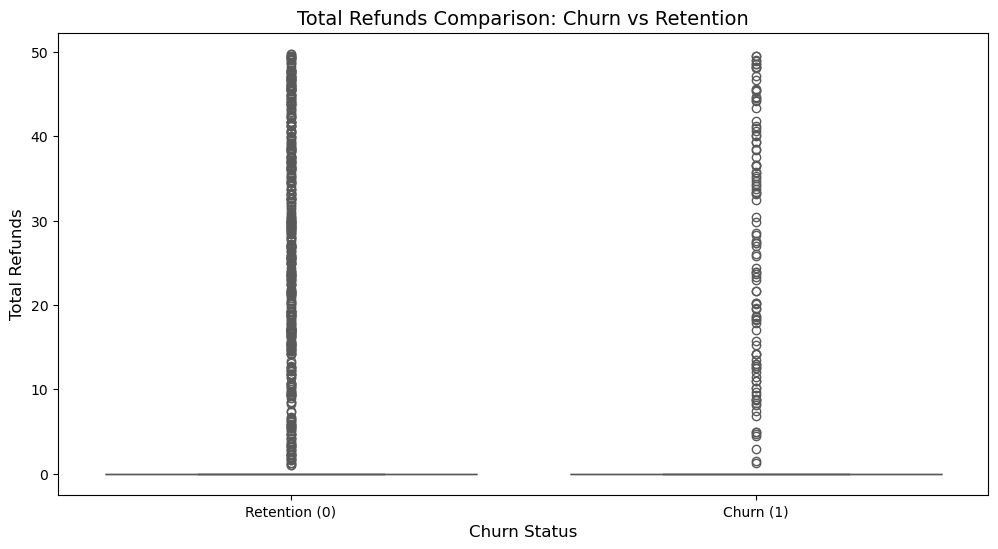

In [40]:
# 이탈한 사람과 유지한 사람의 총 환불 금액 비교
# 박스 플롯으로 이탈/유지 비교
plt.figure(figsize=(12, 6))
sns.boxplot(x='churn_value', y='total_refunds', data=df, palette='Set2')
plt.xticks([0, 1], ['Retention (0)', 'Churn (1)'])
plt.title('Total Refunds Comparison: Churn vs Retention', fontsize=14)
plt.xlabel('Churn Status', fontsize=12)
plt.ylabel('Total Refunds', fontsize=12)
plt.show()


* 총 환불 금액은 값이 크지 않기 때문에 큰 차이가 없음.

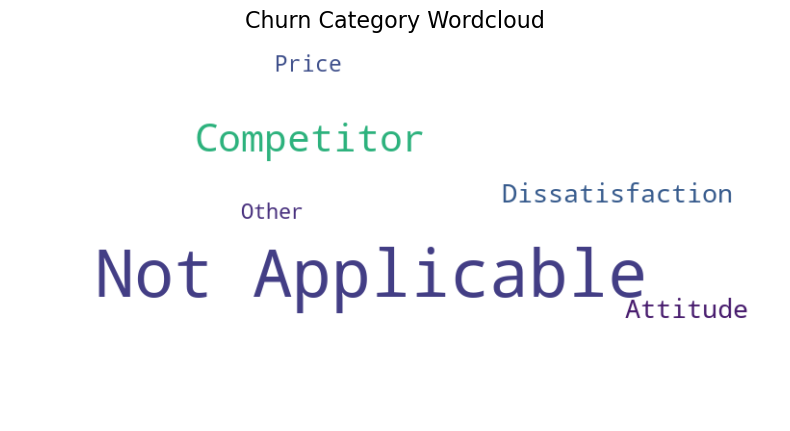

In [41]:
# churn_category 빈도 기반 워드클라우드 시각화
word_counts = Counter(churn_reason['churn_category'])

# 워드클라우드 생성
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'
).generate_from_frequencies(word_counts)

# 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Churn Category Wordcloud', fontsize=16)
plt.show()

* 유지한 사람의 비율이 더 많기 때문에 Not Applicable이 제일 크게 보임.
* 이탈한 사람 중에서는 Competitor 경쟁사를 선택한 사람들이 가장 많았음.

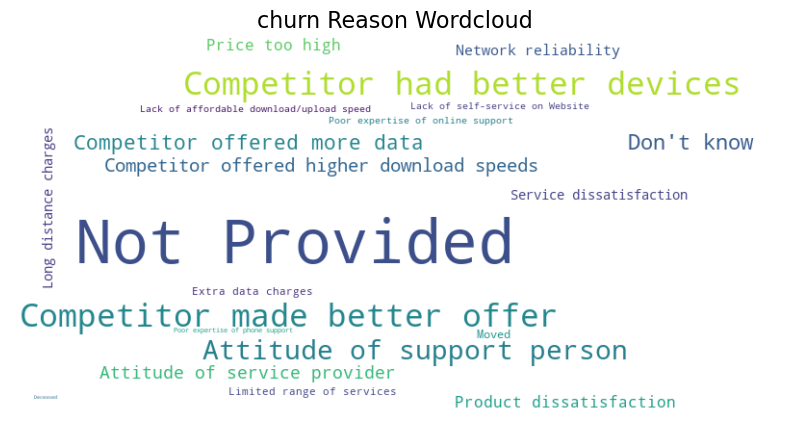

In [42]:
# churn_reason 빈도 기반 워드클라우드 시각화
churn_reason = churn_reason.dropna()
word_counts = Counter(churn_reason['churn_reason'])

# 워드클라우드 생성
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'
).generate_from_frequencies(word_counts)

# 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('churn Reason Wordcloud', fontsize=16)
plt.show()

* 이탈의 세부적인 이유 중에는 결측값을 설정했던 'Not provided'가 가장 많았고,
  경쟁자와 관련된 것이 그 다음으로 많은 부분을 차지함.
* 경쟁사가 더 좋은 기기, 더 좋은 제안, 다운로드 속도가 빠르다는 이유가 크게 나타남.
* 제한된 서비스, 전문적이지 않은 지원은 이탈에 영향을 크게 주지 않음.

# 데이터 전처리

* 고유값 컬럼 제거
* 스케일링
* Yes/No로 표시된 값들 전부 1/0으로 인코딩

In [42]:
# 모든 열이 출력되도록 바꿔서 기본 통계 확인
original_max_rows=pd.get_option('display.max_rows')
pd.set_option('display.max_columns', None)
df.describe(include='object')

NameError: name 'pd' is not defined

* 값이 2개 (Yes/No)로 이루어진 컬럼은 원핫인코딩
* 3, 4, 6개는 더미 인코딩

In [ ]:
# 데이터 분할
data = df.drop('churn_value', axis=1)
target = df['churn_value']

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.3, random_state=42)

In [45]:
# 고유값 컬럼 제거
train_input = train_input.drop(columns=['customer_id', 'city'], axis=1)
test_input = test_input.drop(columns=['customer_id', 'city'], axis=1)

In [46]:
train_input.describe()

,age,number_of_dependents,total_population,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,avg_monthly_gb_download,number_of_referrals
count,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000
mean,46.455984,0.460041,22318.303245,23.033172,2286.522391,1.956452,6.764706,751.979471,20.863489,1.960852
std,16.803514,0.950662,21363.603261,15.539198,2267.943810,7.968326,25.114455,852.856662,20.602830,3.004880
min,19.000000,0.000000,11.000000,0.000000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,2277.250000,9.167500,409.187500,0.000000,0.000000,69.525000,4.000000,0.000000
50%,46.000000,0.000000,17671.000000,23.025000,1401.000000,0.000000,0.000000,389.630000,17.000000,0.000000
75%,60.000000,0.000000,36432.000000,36.595000,3777.462500,0.000000,0.000000,1194.120000,27.000000,3.000000
max,80.000000,8.000000,105285.000000,49.990000,8684.800000,49.790000,150.000000,3564.720000,85.000000,11.000000


In [47]:
# 스케일링	
cols = ['age', 'number_of_dependents', 'total_population', 'avg_monthly_long_distance_charges', 'total_charges', 'total_refunds', 'total_extra_data_charges',
        'total_long_distance_charges', 'avg_monthly_gb_download', 'number_of_referrals']
for col in cols:
    std = StandardScaler()
    std.fit(train_input[[col]])
    train_input[col] = std.transform(train_input[[col]]).flatten()
    test_input[col] = std.transform(test_input[[col]]).flatten()
    
train_input.describe()

,age,number_of_dependents,total_population,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,avg_monthly_gb_download,number_of_referrals
count,4.930000e+03,4.930000e+03,4.930000e+03,4.930000e+03,4930.000000,4.930000e+03,4.930000e+03,4.930000e+03,4.930000e+03,4.930000e+03
mean,1.657453e-17,-8.647579e-18,-1.441263e-17,-7.206316e-19,0.000000,3.675221e-17,2.594274e-17,-9.079958e-17,-6.701874e-17,2.233958e-17
std,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00
min,-1.634109e+00,-4.839649e-01,-1.044279e+00,-1.482413e+00,-1.000004,-2.455535e-01,-2.693824e-01,-8.818079e-01,-1.012754e+00,-6.526220e-01
25%,-8.603826e-01,-4.839649e-01,-9.381885e-01,-8.923935e-01,-0.827854,-2.455535e-01,-2.693824e-01,-8.002795e-01,-8.185866e-01,-6.526220e-01
50%,-2.713897e-02,-4.839649e-01,-2.175557e-01,-5.259758e-04,-0.390491,-2.455535e-01,-2.693824e-01,-4.249087e-01,-1.875413e-01,-6.526220e-01
75%,8.061046e-01,-4.839649e-01,6.607092e-01,8.728380e-01,0.657464,-2.455535e-01,-2.693824e-01,5.184756e-01,2.978782e-01,3.458552e-01
max,1.996453e+00,7.932074e+00,3.883947e+00,1.734939e+00,2.821466,6.003569e+00,5.703879e+00,3.298357e+00,3.113311e+00,3.008461e+00


In [48]:
# 범주형 변수 처리 - gender
onehot_yn = OneHotEncoder()
yn_train = train_input[['gender']]
yn_test = test_input[['gender']]

onehot_yn.fit(yn_train)
yn_train_onehot_yn = onehot_yn.transform(yn_train).toarray()
yn_test_onehot_yn = onehot_yn.transform(yn_test).toarray()

train_input['gender'] = yn_train_onehot_yn[:, 1].astype(np.uint8)
test_input['gender'] = yn_test_onehot_yn[:, 1].astype(np.uint8)

train_input.head()

,gender,age,under_30,senior_citizen,partner,number_of_dependents,married,total_population,phone_service,internet_service,online_security,online_backup,device_protection,premium_tech_support,streaming_tv,streaming_movies,streaming_music,internet_type,contract,paperless_billing,payment_method,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,multiple_lines,avg_monthly_gb_download,unlimited_data,offer,referred_a_friend,number_of_referrals
1695,1,-0.443761,No,No,Yes,1.620045,Yes,1.260388,Yes,Yes,No,Yes,Yes,No,No,Yes,Yes,Fiber Optic,Month-to-Month,Yes,Electronic check,1.225852,-0.774138,-0.245554,-0.269382,-0.585738,No,0.394962,Yes,Not Provided,Yes,1.011507
1095,1,0.389483,No,No,No,-0.483965,No,0.541148,Yes,Yes,No,No,No,No,No,No,No,Fiber Optic,Month-to-Month,No,Credit card (automatic),0.129159,0.154132,-0.245554,-0.269382,0.145902,Yes,0.006627,Yes,Offer C,No,-0.652622
3889,1,0.687070,No,No,No,-0.483965,No,-1.032669,Yes,No,No,No,No,No,No,No,No,Not Provided,Two Year,Yes,Mailed check,-0.253139,-0.843591,-0.245554,-0.269382,-0.456254,No,-1.012754,No,Not Provided,No,-0.652622
3667,1,0.568035,No,No,No,-0.483965,No,0.932554,Yes,Yes,No,Yes,No,No,No,No,No,Fiber Optic,Month-to-Month,Yes,Mailed check,0.470910,-0.302627,-0.245554,1.721705,-0.098830,Yes,-0.527335,No,Offer D,No,-0.652622
2902,1,-0.860383,No,No,Yes,-0.483965,Yes,1.232628,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Cable,Month-to-Month,No,Mailed check,0.375014,-0.220871,-0.245554,-0.269382,0.065786,No,0.152252,Yes,Offer C,Yes,1.677158


In [49]:
# 범주형 변수 처리 - yes/no로 구성
columns_to_encode = [
    'under_30', 'senior_citizen', 'partner', 'married', 'phone_service',
    'internet_service', 'online_security', 'online_backup', 'device_protection',
    'premium_tech_support', 'streaming_tv', 'streaming_movies',
    'streaming_music', 'paperless_billing', 'multiple_lines',
    'unlimited_data', 'referred_a_friend'
]

# OneHotEncoder 초기화
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)

# 원핫인코딩 수행
onehot_encoder.fit(train_input[columns_to_encode])

train_encoded = onehot_encoder.transform(train_input[columns_to_encode])
test_encoded = onehot_encoder.transform(test_input[columns_to_encode])

# 새로운 데이터프레임 생성
train_encoded_df = pd.DataFrame(train_encoded, columns=onehot_encoder.get_feature_names_out(columns_to_encode), index=train_input.index).astype(int)
test_encoded_df = pd.DataFrame(test_encoded, columns=onehot_encoder.get_feature_names_out(columns_to_encode), index=test_input.index).astype(int)

# 기존 데이터프레임에서 원핫인코딩된 컬럼 제거 후 결합
train_input = pd.concat([train_input.drop(columns=columns_to_encode), train_encoded_df], axis=1)
test_input = pd.concat([test_input.drop(columns=columns_to_encode), test_encoded_df], axis=1)

# 결과 확인
train_input

,gender,age,number_of_dependents,total_population,internet_type,contract,payment_method,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,avg_monthly_gb_download,offer,number_of_referrals,under_30_Yes,senior_citizen_Yes,partner_Yes,married_Yes,phone_service_Yes,internet_service_Yes,online_security_Yes,online_backup_Yes,device_protection_Yes,premium_tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,streaming_music_Yes,paperless_billing_Yes,multiple_lines_Yes,unlimited_data_Yes,referred_a_friend_Yes
1695,1,-0.443761,1.620045,1.260388,Fiber Optic,Month-to-Month,Electronic check,1.225852,-0.774138,-0.245554,-0.269382,-0.585738,0.394962,Not Provided,1.011507,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,1,1
1095,1,0.389483,-0.483965,0.541148,Fiber Optic,Month-to-Month,Credit card (automatic),0.129159,0.154132,-0.245554,-0.269382,0.145902,0.006627,Offer C,-0.652622,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0
3889,1,0.687070,-0.483965,-1.032669,Not Provided,Two Year,Mailed check,-0.253139,-0.843591,-0.245554,-0.269382,-0.456254,-1.012754,Not Provided,-0.652622,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3667,1,0.568035,-0.483965,0.932554,Fiber Optic,Month-to-Month,Mailed check,0.470910,-0.302627,-0.245554,1.721705,-0.098830,-0.527335,Offer D,-0.652622,0,0,0,0,1,1,0,1,0,0,0,0,0,1,1,0,0
2902,1,-0.860383,-0.483965,1.232628,Cable,Month-to-Month,Mailed check,0.375014,-0.220871,-0.245554,-0.269382,0.065786,0.152252,Offer C,1.677158,0,0,1,1,1,1,1,1,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1,0.270448,-0.483965,-0.764148,Not Provided,Two Year,Electronic check,-0.618703,-0.608310,-0.245554,-0.269382,-0.157908,-1.012754,Not Provided,-0.652622,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5191,0,-0.681830,-0.483965,0.083079,Not Provided,Month-to-Month,Mailed check,-0.042682,-0.999849,-0.245554,-0.269382,-0.855576,-1.012754,Not Provided,-0.652622,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5226,0,-0.800865,-0.483965,-0.150238,Not Provided,One Year,Electronic check,-1.073084,-0.965299,-0.245554,-0.269382,-0.851976,-1.012754,Offer E,-0.652622,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5390,1,-0.681830,-0.483965,-1.025882,Not Provided,Month-to-Month,Mailed check,-0.327796,-0.999673,-0.245554,-0.269382,-0.860771,-1.012754,Offer E,-0.652622,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
# 더미코딩 - internet_type, contract, payment_method, offer
train_input = pd.get_dummies(train_input, columns=['internet_type', 'contract', 'payment_method', 'offer'])
test_input = pd.get_dummies(test_input, columns=['internet_type', 'contract', 'payment_method', 'offer'])

train_input.head()

,gender,age,number_of_dependents,total_population,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,avg_monthly_gb_download,number_of_referrals,under_30_Yes,senior_citizen_Yes,partner_Yes,married_Yes,phone_service_Yes,internet_service_Yes,online_security_Yes,online_backup_Yes,device_protection_Yes,premium_tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,streaming_music_Yes,paperless_billing_Yes,multiple_lines_Yes,unlimited_data_Yes,referred_a_friend_Yes,internet_type_Cable,internet_type_DSL,internet_type_Fiber Optic,internet_type_Not Provided,contract_Month-to-Month,contract_One Year,contract_Two Year,payment_method_Bank transfer (automatic),payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,offer_Not Provided,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
1695,1,-0.443761,1.620045,1.260388,1.225852,-0.774138,-0.245554,-0.269382,-0.585738,0.394962,1.011507,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,1,1,False,False,True,False,True,False,False,False,False,True,False,True,False,False,False,False,False
1095,1,0.389483,-0.483965,0.541148,0.129159,0.154132,-0.245554,-0.269382,0.145902,0.006627,-0.652622,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,False,False,True,False,True,False,False,False,True,False,False,False,False,False,True,False,False
3889,1,0.687070,-0.483965,-1.032669,-0.253139,-0.843591,-0.245554,-0.269382,-0.456254,-1.012754,-0.652622,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,False,False,False,True,False,False,True,False,False,False,True,True,False,False,False,False,False
3667,1,0.568035,-0.483965,0.932554,0.470910,-0.302627,-0.245554,1.721705,-0.098830,-0.527335,-0.652622,0,0,0,0,1,1,0,1,0,0,0,0,0,1,1,0,0,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,True,False
2902,1,-0.860383,-0.483965,1.232628,0.375014,-0.220871,-0.245554,-0.269382,0.065786,0.152252,1.677158,0,0,1,1,1,1,1,1,0,1,0,0,0,0,0,1,1,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False


In [51]:
# 전처리 완료한 train_input, test_input 크기 확인
print(train_input.shape)
print(test_input.shape)

(4930, 45)
(2113, 45)


총 45개의 열로 구성된 데이터셋

# 모델링

In [52]:
# 결정트리 모델링
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_input, train_target)
pred_target = dt.predict(test_input)
print(dt.score(train_input, train_target))
print(classification_report(test_target, pred_target))

1.0
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1562
           1       0.57      0.60      0.58       551

    accuracy                           0.78      2113
   macro avg       0.71      0.72      0.72      2113
weighted avg       0.78      0.78      0.78      2113



* random_state만 지정한 모델에서는 과적합 발생
* 이탈자 데이터가 더 적은 경우라서 모든 값이 더 작음

In [53]:
# LGBM 모델링
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(train_input, train_target)
pred_target = lgbm.predict(test_input)
print(lgbm.score(train_input, train_target))
print(classification_report(test_target, pred_target))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1318, number of negative: 3612
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001105 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1363
[LightGBM] [Info] Number of data points in the train set: 4930, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267343 -> initscore=-1.008146
[LightGBM] [Info] Start training from score -1.008146


  File "C:\Users\kshee\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\kshee\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kshee\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\kshee\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


0.9565922920892495
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1562
           1       0.73      0.64      0.68       551

    accuracy                           0.84      2113
   macro avg       0.80      0.78      0.79      2113
weighted avg       0.84      0.84      0.84      2113



* 과적합이 줄어들고, 전체적으로 모든 점수가 향상됨.

성능이 가장 좋은 LGBMClassifier를 기준으로 하이퍼 파라미터 튜닝 진행

# 하이퍼 파라미터 튜닝

LGNM 하이퍼 파라미터 설명
* boosting_type: gbdt(부스팅), rf(배깅), dart(드롭아웃)
* num_leaves: 각 트리의 최대 리프 수
* max_depth: 트리 최대 깊이 (0보다 작으면 제한 없음)
* learning_rate: 학습율
* n_estimators: 생성할 트리 개수

In [54]:
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}
params = {
    'num_leaves': [10, 15, 20],
    'max_depth': [7, 10, 13],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [7, 9, 13]
}

lgbm = LGBMClassifier(random_state=42)

gs = GridSearchCV(estimator=lgbm, param_grid=params, scoring=scoring,
                  cv=5, n_jobs=-1, refit='accuracy')

위 코드와 같이 다중 지표 accuracy, precision, recall, f1-score를 모두 확인할 때는, GridSearchCV 메소드에 refit을 반드시 지정해주어야 모델이 실행됨.

In [55]:
gs.fit(train_input, train_target)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1318, number of negative: 3612
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003757 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1363
[LightGBM] [Info] Number of data points in the train set: 4930, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267343 -> initscore=-1.008146
[LightGBM] [Info] Start training from score -1.008146


GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [7, 10, 13], 'n_estimators': [7, 9, 13],
                         'num_leaves': [10, 15, 20]},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score, response_method='predict'),
                      'f1': make_scorer(f1_score, response_method='predict'),
                      'precision': make_scorer(precision_score, response_method='predict'),
                      'recall': make_scorer(recall_score, response_method='predict')})

In [56]:
best_params = gs.best_params_
best_score = gs.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Accuracy: {best_score:.4f}")

Best Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 13, 'num_leaves': 20}
Best Accuracy: 0.8357


In [57]:
#최종 모델 성능 확인

best_lgbm = LGBMClassifier(num_leaves=20, max_depth=10, learning_rate=0.1, n_estimators=13)
best_lgbm.fit(train_input, train_target)
pred_target = best_lgbm.predict(test_input)
print(classification_report(test_target, pred_target))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1318, number of negative: 3612
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001118 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1363
[LightGBM] [Info] Number of data points in the train set: 4930, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267343 -> initscore=-1.008146
[LightGBM] [Info] Start training from score -1.008146
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      1562
           1       0.76      0.48      0.59       551

    accuracy                           0.82      2113
   macro avg       0.80      0.71      0.74      2113
weighted avg       0.82      0.82      0.81      2113



In [58]:
importance_df = pd.DataFrame({
    "Feature": train_input.columns,
    "Importance": best_lgbm.feature_importances_
}).sort_values(by="Importance", ascending=False)
print(importance_df)
                

                                     Feature  Importance
10                       number_of_referrals          52
5                              total_charges          26
2                       number_of_dependents          24
8                total_long_distance_charges          20
1                                        age          18
32                   contract_Month-to-Month          13
9                    avg_monthly_gb_download          12
33                         contract_One Year          11
21                          streaming_tv_Yes          11
30                 internet_type_Fiber Optic           9
13                               partner_Yes           9
22                      streaming_movies_Yes           7
37           payment_method_Electronic check           6
3                           total_population           4
23                       streaming_music_Yes           4
41                             offer_Offer B           3
29                         inte

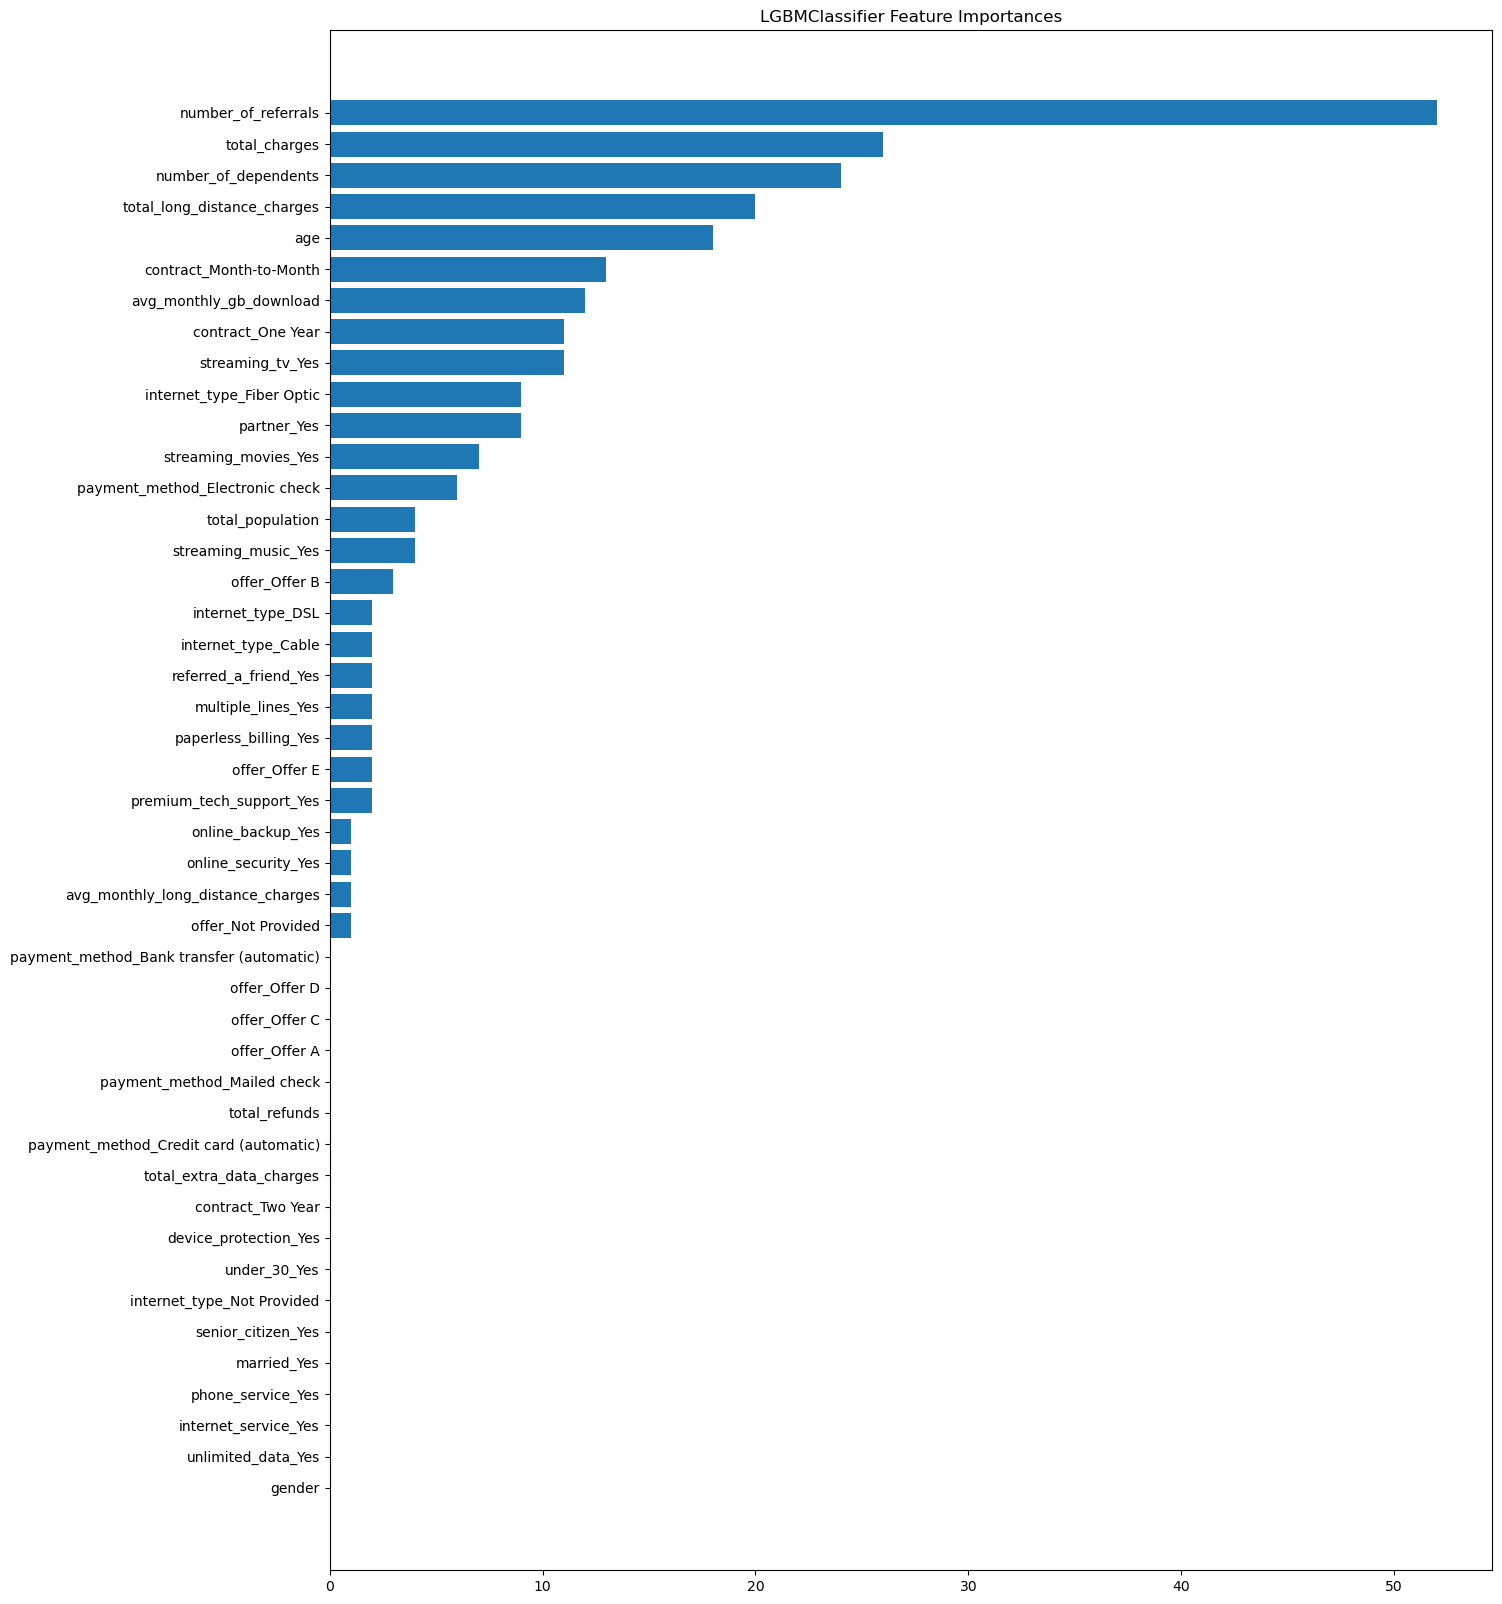

In [59]:
# 속성 중요도 시각화
plt.figure(figsize=(15, 20))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title('LGBMClassifier Feature Importances')
plt.show()